In [9]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
im =  cv2.imread('elephant.jpg')

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


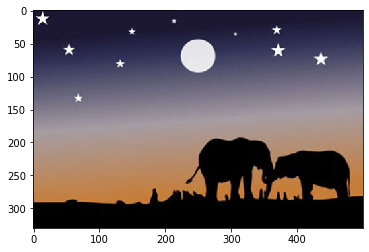

In [4]:
plt.imshow(im) 
plt.show()

In [5]:
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [6]:
from sklearn.cluster import KMeans

In [7]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
centers = km.cluster_centers_
centers = np.array(centers,dtype='uint8')
print(centers)

[[174 145 128]
 [ 38  35  64]
 [  1   0   1]
 [ 98  94 117]]


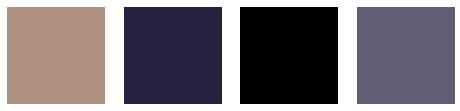

In [11]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [12]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


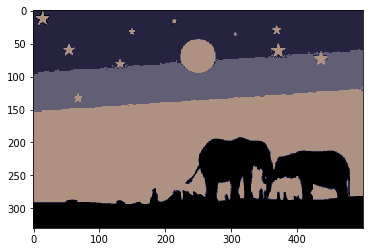

In [13]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()